In [108]:
'''****************************************************************
Final Project
File: Bgaggainpali_DSC530_FinalProject_diamonds.ipynb
Name: Bhargava Gaggainpali
Date: 05/30/2020
Course: DSC 530 Data Exploration and Analysis
Assignment: 12.2 - Term Project
****************************************************************'''

'****************************************************************\nFinal Project\nFile: Bgaggainpali_DSC530_FinalProject_diamonds.ipynb\nName: Bhargava Gaggainpali\nDate: 05/30/2020\nCourse: DSC 530 Data Exploration and Analysis\nAssignment: 12.2 - Term Project\n****************************************************************'

In [109]:
''' Import all the required packages'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2
import thinkplot

In [110]:
'''
Using the data from the source (https://www.kaggle.com/shivam2503/diamonds/) for this task.
'''
# Import the data from the file.
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


******************************************************************************************************
TASK: 
A minimum of 5 variables in your dataset used during your analysis 
(for help with selecting, the author made his selection on page 6 of your book). 
Consider what you think could have an impact on your question – remember this is never perfect, 
so don’t be worried if you miss one (Chapter 1).

In [111]:
del df[df.columns[0]]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [112]:
'''Now let us check any null values is present in the data.'''
df.isnull().values.any()
'''Fortunately, there were no null values present in this dataset as we can see from the above IsNull() 
function output which returns true if any null values present in the data frame and false if there are no null values.'''

'Fortunately, there were no null values present in this dataset as we can see from the above IsNull() \nfunction output which returns true if any null values present in the data frame and false if there are no null values.'

In [113]:
'''
From above we can see that the column names are not clear and are misguiding. 
So renaming the columns to have a better understanding.

Existing      Replaced

depth      -> depth %
table      -> table %
x          -> length
y          -> width
z          -> depth
'''
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)
df.head()



,carat,cut,color,clarity,depth %,table %,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


******************************************************************************************************
TASK:
Describe what the 5 variables mean in the dataset (Chapter 1).


Four main features which are used to access the quality of a diamond, are listed down below.

Carat Weight
Cut
Clarity
Color

Carat Weight : Carat is a metric that is used to measure the weight of a diamond. One carat is equivalent to 200mg. Diamond prices increase with diamond carat weight, which means bigger the diamond higher the price. If two diamonds weights are equal, then other features are used to determine the price.

Clarity : Diamonds are generated from sheer pressure and heat below the ground. Therefore, there will be some inclusion inside a diamond i.e., a mark or line pattern inside a diamond. 

Cut: This feature is an important thing to notice in a diamond as it measures three crucial things, such as 
Brilliance, Fire, Scintillation.

Depth %: Depth is the distance from a top surface i.e., table to a culet. The depth percentage is calculated by dividing the diamond depth by the overall width of a diamond. Lower the depth percentage the bigger the diamond looks from the below i.e., pavilion.

Table %: The table is the topmost surface of a diamond and the most significant facet of the round diamond. An appropriate width of a table will allow the light to enter and reflect on the appropriate direction. 

Color: Color measurement in diamond measures lacks color. If the diamond color is like a drop of water that is colorless, it will have a high value. As then only it can scatter the light without observing. 


******************************************************************************************************
TASK:
Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth %    53940 non-null float64
table %    53940 non-null float64
price      53940 non-null int64
length     53940 non-null float64
width      53940 non-null float64
depth      53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [115]:
print("Mean value of 'carat' is :",df['carat'].mean())
print("Variance value of 'carat' is :",df['carat'].var())
print("Standard deviation value of 'carat' is :",df['carat'].std())

Mean value of 'carat' is : 0.7979397478679852
Variance value of 'carat' is : 0.22468665982273753
Standard deviation value of 'carat' is : 0.47401124440538067


In [116]:
print("Mean value of 'price' is :",df['price'].mean())
print("Variance value of 'price' is :",df['price'].var())
print("Standard deviation value of 'price' is :",df['price'].std())

Mean value of 'price' is : 3932.799721913237
Variance value of 'price' is : 15915629.424300838
Standard deviation value of 'price' is : 3989.4397381463023


In [117]:
print("Mean value of 'length' is :",df['length'].mean())
print("Variance value of 'length' is :",df['length'].var())
print("Standard deviation value of 'length' is :",df['length'].std())

Mean value of 'length' is : 5.731157211716609
Variance value of 'length' is : 1.2583471730443379
Standard deviation value of 'length' is : 1.1217607467924422


In [118]:
print("Mean value of 'width' is :",df['width'].mean())
print("Variance value of 'width' is :",df['width'].var())
print("Standard deviation value of 'width' is :",df['width'].std())

Mean value of 'width' is : 5.734525954764462
Variance value of 'width' is : 1.3044716138352839
Standard deviation value of 'width' is : 1.1421346741235396


In [119]:
print("Mean value of 'depth' is :",df['depth'].mean())
print("Variance value of 'depth' is :",df['depth'].var())
print("Standard deviation value of 'depth' is :",df['depth'].std())

Mean value of 'depth' is : 3.5387337782723316
Variance value of 'depth' is : 0.4980108625865544
Standard deviation value of 'depth' is : 0.7056988469499964


In [120]:
df.describe()

,carat,depth %,table %,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


******************************************************************************************************
TASK:
Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

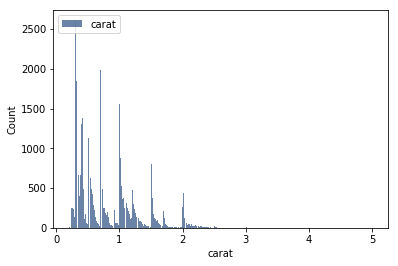

In [121]:
#Histogram of carat
hist_carat = thinkstats2.Hist(df['carat'], label='carat')
thinkplot.Hist(hist_carat)
thinkplot.Config(xlabel='carat', ylabel='Count')

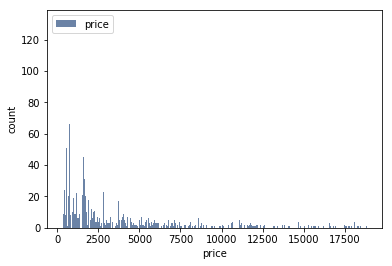

In [122]:
#Histogram of price
hist_price = thinkstats2.Hist(df['price'], label='price')
thinkplot.Hist(hist_price)
thinkplot.Config(xlabel='price', ylabel='count')

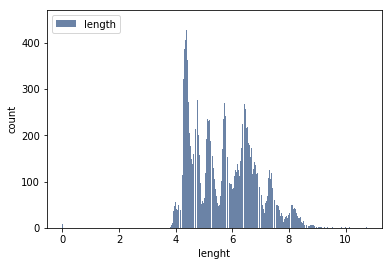

In [123]:
#Histogram of length
hist_length = thinkstats2.Hist(df['length'], label='length')
thinkplot.Hist(hist_length)
thinkplot.Config(xlabel='lenght', ylabel='count')

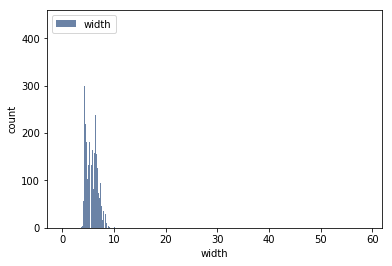

In [124]:
#Histogram of width
hist_width = thinkstats2.Hist(df['width'], label='width')
thinkplot.Hist(hist_width)
thinkplot.Config(xlabel='width', ylabel='count')

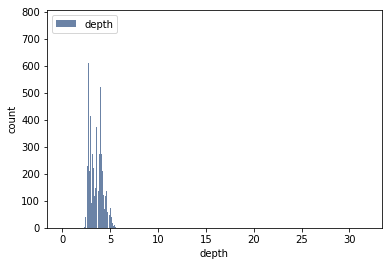

In [125]:
#Histogram of depth
hist_depth = thinkstats2.Hist(df['depth'], label='depth')
thinkplot.Hist(hist_depth)
thinkplot.Config(xlabel='depth', ylabel='count')

TASK: 
Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [126]:
n = hist_carat.Total()
pmf_carat = hist_carat.Copy()
for x, freq in hist_carat.Items():
    pmf_carat[x] = freq / n
pmf_carat[x]

1.853911753800519e-05

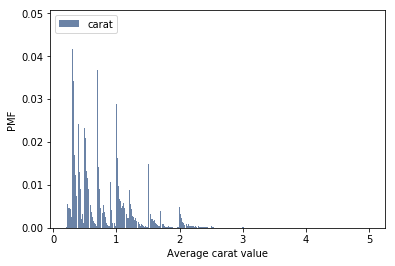

In [127]:
thinkplot.Hist(pmf_carat)
thinkplot.Config(xlabel='Average carat value', ylabel='PMF')


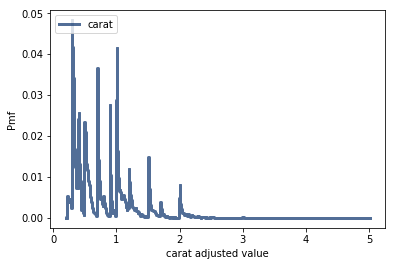

In [128]:
thinkplot.Pmf(pmf_carat)
thinkplot.Config(xlabel='carat adjusted value', ylabel='Pmf')

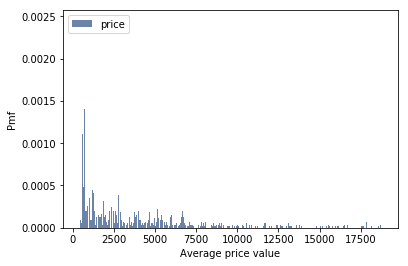

In [129]:
pmf_price = thinkstats2.Pmf(df['price'], label='price')
thinkplot.Hist(pmf_price)
thinkplot.Config(xlabel='Average price value', ylabel='Pmf')

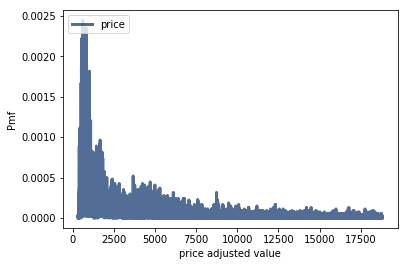

In [130]:
thinkplot.Pmf(pmf_price)
thinkplot.Config(xlabel='price adjusted value', ylabel='Pmf')

TASK:
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

"\nThe CDF shows us some useful information if we consider percentiles. \nIt looks like less than 5% of carat values are below 0.5 and nearly 90% of the carat values are above 1.5. \nCommon carat values appear as the steeper portion of our line, likely above the value of ~2.0 \nOur visual representation doesn't show a clear mode.\n"

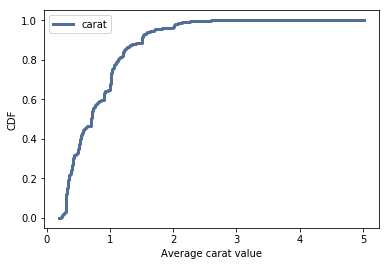

In [131]:
cdf = thinkstats2.Cdf(df['carat'], label='carat')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Average carat value', ylabel='CDF', loc='upper left')
'''
The CDF shows us some useful information if we consider percentiles. 
It looks like less than 5% of carat values are below 0.5 and nearly 90% of the carat values are above 1.5. 
Common carat values appear as the steeper portion of our line, likely above the value of ~2.0 
Our visual representation doesn't show a clear mode.
'''

Mean, Var 3824.5113124739887 14056038.253239283
Sigma 3749.138334769642


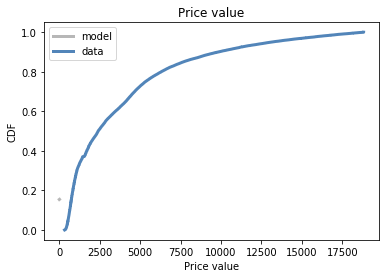

In [132]:
#Estimate parameters
mean, variance = thinkstats2.TrimmedMeanVar(df['price'], p=0.01)
print('Mean, Var', mean, variance)
    
# plot the model
sigma = np.sqrt(variance)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mean, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df['price'], label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Price value',
                 xlabel='Price value',
                 ylabel='CDF')

TASK:
Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

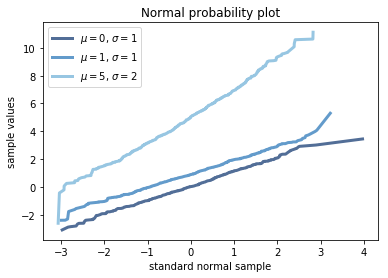

In [133]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

TASK: 
Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

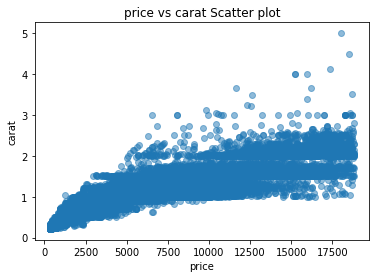

In [134]:
plt.scatter(df['price'],df['carat'] , alpha=0.5)
plt.title('price vs carat Scatter plot')
plt.xlabel('price')
plt.ylabel('carat')
plt.show()


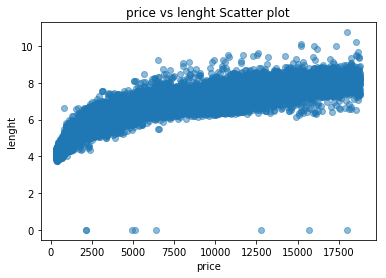

In [135]:
plt.scatter(df['price'],df['length'] , alpha=0.5)
plt.title('price vs lenght Scatter plot')
plt.xlabel('price')
plt.ylabel('lenght')

plt.show()

In [136]:
# calculate the pearson correlation
pCorrcarat = df.carat.corr(df.price, method='pearson')
pCorrlength = df.length.corr(df.price, method='pearson')

print("The correlation for carat is: {:.2f}".format(pCorrcarat))
print("The correlation for length is: {:.2f}".format(pCorrlength))

The correlation for carat is: 0.92
The correlation for length is: 0.88


In [137]:

np.cov(np.stack((df['price'], df['carat']), axis = 0))


array([[1.59156294e+07, 1.74276536e+03],
       [1.74276536e+03, 2.24686660e-01]])

In [138]:
np.cov(np.stack((df['price'], df['length']), axis = 0))

array([[1.59156294e+07, 3.95802149e+03],
       [3.95802149e+03, 1.25834717e+00]])

TASK:
For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [139]:
import statsmodels.formula.api as smf

formula = 'price ~ carat'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        22:44:18   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
formula = 'price ~ length'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 1.937e+05
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        22:44:19   Log-Likelihood:            -4.8267e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53938   BIC:                         9.654e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.409e+04     41.732   -337.724      0.000   -1.42e+04    -1.4e+04
length      3145.4129      7.146    440.159      0.000    3131.407    3159.419
==============================================================================
Omnibus:                    18925.546   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145027.106
Skew:                           1.485   Prob(JB):                         0.00
Kurtosis:                      10.464   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""